In [ ]:
# Import libraries
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K

import shutil

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import random

import pickle
from tqdm import tqdm

import pickle
import cv2

from shutil import copyfile

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
PATH = os.getcwd()
# Define data path
source_path = '/content/gdrive/MyDrive/Dataset/data'
source_path_train_validation= '/content/gdrive/MyDrive/Dataset'
source_dir_list = os.listdir(source_path)
source_dir_list

folders = ['Validation', 'Train']

# Klasörleri oluşturma işlemi
for folder in folders:
    folder_path = os.path.join(source_path_train_validation, folder)
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print(f"{folder} klasörü oluşturuldu.")
    else:
        print(f"{folder} klasörü zaten mevcut.")

# Oluşturulan klasörlerin içeriğini kontrol etme
source_dir_list = os.listdir(source_path_train_validation)
print("\nContents of source directory:")
print(source_dir_list)

CATEGORIES=["bike","cars","cats","dogs","flowers","horses","human"]

# Yeni kombinasyon kategorileri ekleyin

validation_path = os.path.join(source_path_train_validation, 'Validation')
train_path = os.path.join(source_path_train_validation, 'Train')

SPLIT_SIZE=0.80


Validation klasörü zaten mevcut.
Train klasörü zaten mevcut.

Contents of source directory:
['data', 'data2', '.ipynb_checkpoints', 'human-horse', 'Validation', 'Train', 'DogVsCat', 'PetImages', 'catvsdogtrainvali']


In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = os.path.join(SOURCE, filename)
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(f'{filename} is zero length, so ignoring.')

    training_length = int(len(files) * SPLIT_SIZE)
    validation_length = len(files) - training_length
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[:training_length]
    validation_set = shuffled_set[training_length:]

    for filename in training_set:
        src_file = os.path.join(SOURCE, filename)
        dest_file = os.path.join(TRAINING, filename)
        copyfile(src_file, dest_file)

    for filename in validation_set:
        src_file = os.path.join(SOURCE, filename)
        dest_file = os.path.join(VALIDATION, filename)
        copyfile(src_file, dest_file)

# Create subfolders for each category in Validation and Train folders
for category in CATEGORIES:
    val_category_path = os.path.join(validation_path, category)
    train_category_path = os.path.join(train_path, category)
    if not os.path.exists(val_category_path):
        os.makedirs(val_category_path)
    if not os.path.exists(train_category_path):
        os.makedirs(train_category_path)


from shutil import copyfile

# Kategorilerin alt klasörlerine veri kopyalama işlemi
for category in CATEGORIES:
    category_path = os.path.join(source_path, category)
    val_category_path = os.path.join(validation_path, category)
    train_category_path = os.path.join(train_path, category)

    # Veri setini belirtilen oranda bölmek için split_data fonksiyonunu çağırma
    split_data(category_path, train_category_path, val_category_path, SPLIT_SIZE)

# Split işleminden sonra eğitim ve doğrulama setlerinin içeriğini kontrol etme
print("\nContents of training directory:")
print(os.listdir(train_path))
print("\nContents of validation directory:")

print(os.listdir(validation_path))


Contents of training directory:
['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

Contents of validation directory:
['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']


In [ ]:
import numpy as np
from tensorflow.keras.utils import img_to_array, load_img

def create_multioutput_dataset(train_dir, val_dir):
    # Eğitim ve doğrulama dizinlerini ve etiketlerini hazırlayın
    train_images = []
    train_labels = {category: [] for category in CATEGORIES}
    val_images = []
    val_labels = {category: [] for category in CATEGORIES}

    for category in CATEGORIES:
        train_category_path = os.path.join(train_dir, category)
        val_category_path = os.path.join(val_dir, category)
        train_files = os.listdir(train_category_path)
        val_files = os.listdir(val_category_path)

        for file in train_files:
            img_path = os.path.join(train_category_path, file)
            img = img_to_array(load_img(img_path, target_size=(150, 150))) / 255.0
            train_images.append(img)
            for cat in CATEGORIES:
                train_labels[cat].append(1 if cat == category else 0)

        for file in val_files:
            img_path = os.path.join(val_category_path, file)
            img = img_to_array(load_img(img_path, target_size=(150, 150))) / 255.0
            val_images.append(img)
            for cat in CATEGORIES:
                val_labels[cat].append(1 if cat == category else 0)

    train_images = np.array(train_images)
    val_images = np.array(val_images)

    for key in train_labels:
        train_labels[key] = np.array(train_labels[key])
    for key in val_labels:
        val_labels[key] = np.array(val_labels[key])

    return train_images, train_labels, val_images, val_labels

train_images, train_labels, val_images, val_labels = create_multioutput_dataset(train_path, validation_path)

print(f"Train Images: {train_images.shape}")
print({key: val.shape for key, val in train_labels.items()})
print(f"Validation Images: {val_images.shape}")
print({key: val.shape for key, val in val_labels.items()})


KeyboardInterrupt: 

In [ ]:
# grader-required-cell
source_path_bike = os.path.join(source_path, 'bike')
source_path_cars = os.path.join(source_path, 'cars')
source_path_cats = os.path.join(source_path, 'cats')
source_path_dogs = os.path.join(source_path, 'dogs')
source_path_flowers = os.path.join(source_path, 'flowers')
source_path_horses = os.path.join(source_path, 'horses')
source_path_human = os.path.join(source_path, 'human')
print(os.listdir(source_path_bike))
# Bu komut, .jpg veya .bmp uzantılarına sahip olmayan tüm dosyaları siler.
!find /content/gdrive/MyDrive/Dataset/data/ -type f ! \( -name "*.jpg" -o -name "*.bmp" -o -name "*.png" \) -exec rm {} +

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_bike))} images of bike.")
print(f"There are {len(os.listdir(source_path_cars))} images of cars.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_flowers))} images of flowers.")
print(f"There are {len(os.listdir(source_path_horses))} images of horses.")
print(f"There are {len(os.listdir(source_path_human))} images of human.")

['bike_002.bmp', 'bike_007.bmp', 'bike_006.bmp', 'bike_010.bmp', 'bike_005.bmp', 'bike_004.bmp', 'bike_003.bmp', 'bike_009.bmp', 'bike_001.bmp', 'bike_008.bmp', 'bike_013.bmp', 'bike_018.bmp', 'bike_030.bmp', 'bike_012.bmp', 'bike_019.bmp', 'bike_024.bmp', 'bike_028.bmp', 'bike_033.bmp', 'bike_032.bmp', 'bike_027.bmp', 'bike_015.bmp', 'bike_020.bmp', 'bike_025.bmp', 'bike_022.bmp', 'bike_034.bmp', 'bike_026.bmp', 'bike_023.bmp', 'bike_017.bmp', 'bike_016.bmp', 'bike_029.bmp', 'bike_011.bmp', 'bike_031.bmp', 'bike_021.bmp', 'bike_014.bmp', 'bike_035.bmp', 'bike_046.bmp', 'bike_045.bmp', 'bike_041.bmp', 'bike_040.bmp', 'bike_039.bmp', 'bike_042.bmp', 'bike_049.bmp', 'bike_043.bmp', 'bike_053.bmp', 'bike_052.bmp', 'bike_047.bmp', 'bike_044.bmp', 'bike_055.bmp', 'bike_048.bmp', 'bike_054.bmp', 'bike_059.bmp', 'bike_050.bmp', 'bike_056.bmp', 'bike_051.bmp', 'bike_036.bmp', 'bike_058.bmp', 'bike_057.bmp', 'bike_037.bmp', 'bike_038.bmp', 'bike_062.bmp', 'bike_082.bmp', 'bike_072.bmp', 'bike_0

In [ ]:
# Her bir kategori için eğitim ve doğrulama setlerindeki dosya sayısını yazdırma
for category in CATEGORIES:
    train_category_path = os.path.join(train_path, category)
    validation_category_path = os.path.join(validation_path, category)

    num_train_files = len(os.listdir(train_category_path))
    num_validation_files = len(os.listdir(validation_category_path))

    print(f"There are {num_train_files} images of {category} for training")
    print(f"There are {num_validation_files} images of {category} for validation")


There are 292 images of bike for training
There are 73 images of bike for validation
There are 296 images of cars for training
There are 75 images of cars for validation
There are 208 images of cats for training
There are 52 images of cats for validation
There are 208 images of dogs for training
There are 52 images of dogs for validation
There are 195 images of flowers for training
There are 49 images of flowers for validation
There are 208 images of horses for training
There are 52 images of horses for validation
There are 211 images of human for training
There are 53 images of human for validation


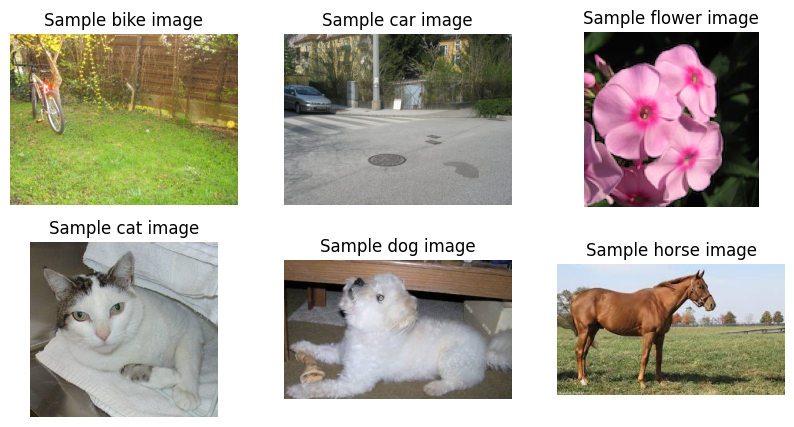

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 3, 1)
plt.imshow(load_img(f"{os.path.join(source_path_bike, os.listdir(source_path_bike)[6])}"))
plt.title("Sample bike image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(load_img(f"{os.path.join(source_path_cars, os.listdir(source_path_cars)[5])}"))
plt.title("Sample car image")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(load_img(f"{os.path.join(source_path_flowers, os.listdir(source_path_flowers)[1])}"))
plt.title("Sample flower image")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(load_img(f"{os.path.join(source_path_cats, os.listdir(source_path_cats)[3])}"))
plt.title("Sample cat image")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(load_img(f"{os.path.join(source_path_dogs, os.listdir(source_path_dogs)[4])}"))
plt.title("Sample dog image")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(load_img(f"{os.path.join(source_path_horses, os.listdir(source_path_horses)[2])}"))
plt.title("Sample horse image")
plt.axis("off")

plt.show()

In [ ]:
nrows = 4
ncols = 4
pic_index = 0

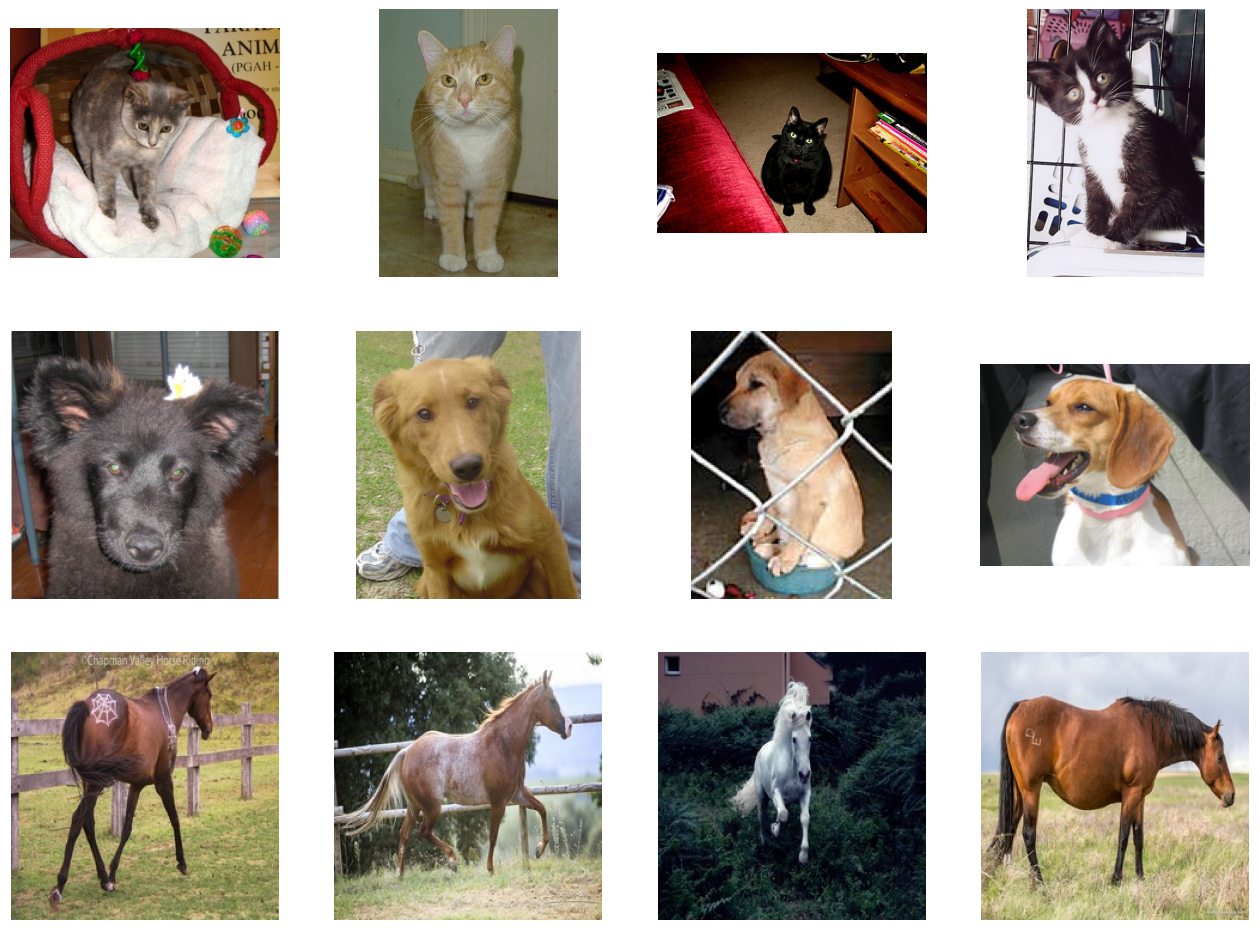

In [ ]:
pig = plt.gcf()
pig.set_size_inches(ncols * 4, nrows * 4)

# Başlangıç indeksini belirleme
pic_index_start = random.randint(0, len(os.listdir(source_path_cats)) - 4)
pic_index_end = pic_index_start + 4

next_cat_pix = [os.path.join(source_path_cats, fname)
                for fname in os.listdir(source_path_cats)[pic_index_start:pic_index_end]
                ]
next_dog_pix = [os.path.join(source_path_dogs, fname)
                for fname in os.listdir(source_path_dogs)[pic_index_start:pic_index_end]
                ]
next_horse_pix = [os.path.join(source_path_horses, fname)
                for fname in os.listdir(source_path_horses)[pic_index_start:pic_index_end]
                ]
next_human_pix = [os.path.join(source_path_human, fname)
                for fname in os.listdir(source_path_human)[pic_index_start:pic_index_end]
                ]

# Tüm resimleri birleştir
all_pix = next_cat_pix + next_dog_pix + next_horse_pix + next_human_pix

for i, img_path in enumerate(all_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# **Data Preprocessing**

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  #train_datagen = ImageDataGenerator( rescale = 1.0/255. )

  train_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')


  train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=24,
                                                        class_mode='categorical',
                                                        target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                  batch_size=24,
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))

  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(train_path, validation_path)

Found 1618 images belonging to 7 classes.
Found 406 images belonging to 7 classes.


# ***Building Model***

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import Adam
#kernel_regularizer=l2(0.01),
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3),  activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),


      tf.keras.layers.Conv2D(64, (3,3),  activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3),  activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Conv2D(128, (3,3),  activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(7, activation='softmax')  # Çıkış katmanı, sınıf sayısına göre ayarlanır
  ])

  # Modeli derleme

  model.compile(optimizer="adam",  # Öğrenme oranını burada ayarlayın
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  return model


def create_multioutput_model(num_categories):
    input_layer = layers.Input(shape=(150, 150, 3))
    x = layers.Conv2D(32, (3,3), kernel_regularizer=l2(0.01), activation='relu')(input_layer)
    x = layers.MaxPooling2D(2, 2)(x)
    tf.keras.layers.Dropout(0.2),
    x = layers.Conv2D(64, (3,3), kernel_regularizer=l2(0.01), activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    tf.keras.layers.Dropout(0.2),
    x = layers.Conv2D(128, (3,3), kernel_regularizer=l2(0.01), activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    tf.keras.layers.Dropout(0.2),
    x = layers.Conv2D(128, (3,3), kernel_regularizer=l2(0.01), activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    tf.keras.layers.Dropout(0.2),
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)

    output_layers = [layers.Dense(1, activation='sigmoid', name=category)(x) for category in CATEGORIES]

    model = Model(inputs=input_layer, outputs=output_layers)

    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',  # Her bir çıkış için binary_crossentropy kullanıyoruz
                  metrics=['accuracy'])

    return model

In [ ]:
model=create_model()
#model=create_multioutput_model(len(CATEGORIES))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# **Training**

In [ ]:
model = create_model()
history = model.fit(
    train_generator,
    epochs=15,  # İterasyon sayısı, kendi projenize göre ayarlayın
    verbose=1,
    validation_data=validation_generator,
)

#history = model.fit(
#    train_images, [train_labels[category] for category in CATEGORIES],
#    epochs=10,
#    validation_data=(val_images, [val_labels[category] for category in CATEGORIES]),
#    verbose=1
#)

Epoch 1/15
25/68 [==========>...................] - ETA: 10:27 - loss: 1.9529 - accuracy: 0.1724

KeyboardInterrupt: 

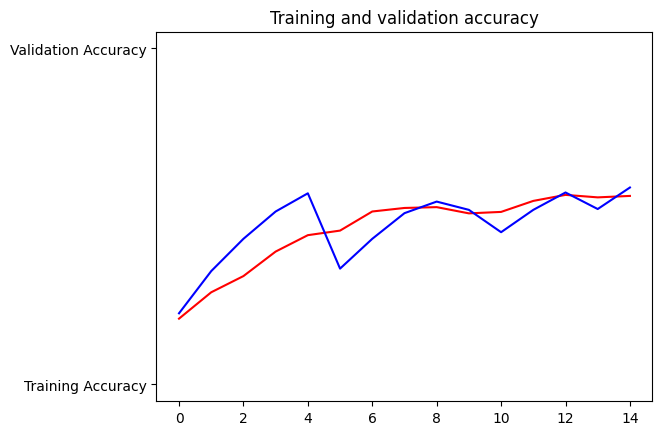

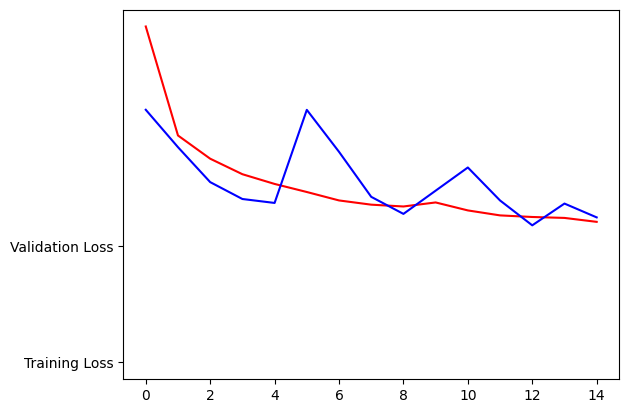

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
# Her bir kategori için loss ve accuracy değerlerini liste şeklinde yazdırma
for category in CATEGORIES:
    print(f'Category: {category}')
    print('Training Loss:', [round(loss, 3) for loss in history.history[f'{category}_loss']])
    print('Validation Loss:', [round(loss, 3) for loss in history.history[f'val_{category}_loss']])
    print('Training Accuracy:', [round(acc, 3) for acc in history.history[f'{category}_accuracy']])
    print('Validation Accuracy:', [round(acc, 3) for acc in history.history[f'val_{category}_accuracy']])
    print('\n')

Category: bike
Training Loss: [0.492, 0.447, 0.377, 0.273, 0.25, 0.234, 0.222, 0.207, 0.206, 0.2]
Validation Loss: [0.461, 0.4, 0.283, 0.223, 0.224, 0.198, 0.24, 0.194, 0.182, 0.219]
Training Accuracy: [0.811, 0.818, 0.851, 0.889, 0.898, 0.91, 0.909, 0.915, 0.906, 0.917]
Validation Accuracy: [0.817, 0.817, 0.894, 0.92, 0.908, 0.932, 0.892, 0.928, 0.93, 0.894]


Category: cars
Training Loss: [0.539, 0.499, 0.419, 0.355, 0.321, 0.307, 0.306, 0.293, 0.27, 0.273]
Validation Loss: [0.525, 0.456, 0.424, 0.35, 0.324, 0.328, 0.32, 0.297, 0.318, 0.295]
Training Accuracy: [0.769, 0.783, 0.807, 0.861, 0.871, 0.867, 0.871, 0.879, 0.889, 0.889]
Validation Accuracy: [0.783, 0.783, 0.857, 0.871, 0.882, 0.869, 0.88, 0.888, 0.876, 0.886]


Category: cats
Training Loss: [0.412, 0.368, 0.357, 0.327, 0.312, 0.296, 0.289, 0.278, 0.268, 0.255]
Validation Loss: [0.381, 0.367, 0.352, 0.329, 0.318, 0.317, 0.342, 0.306, 0.302, 0.313]
Training Accuracy: [0.859, 0.87, 0.87, 0.87, 0.872, 0.876, 0.875, 0.881, 0.886

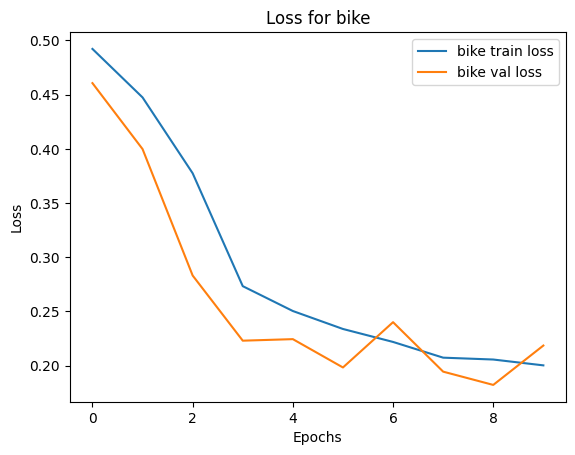

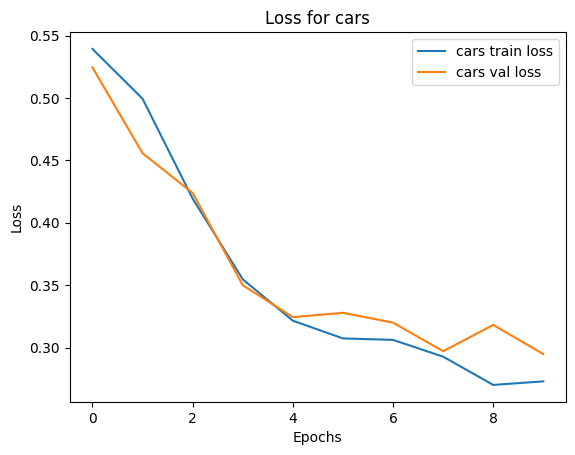

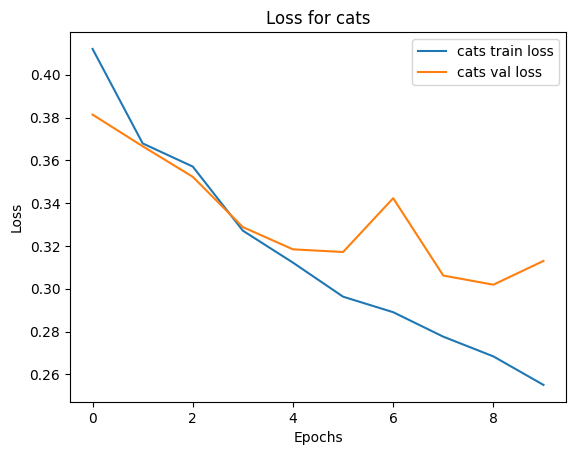

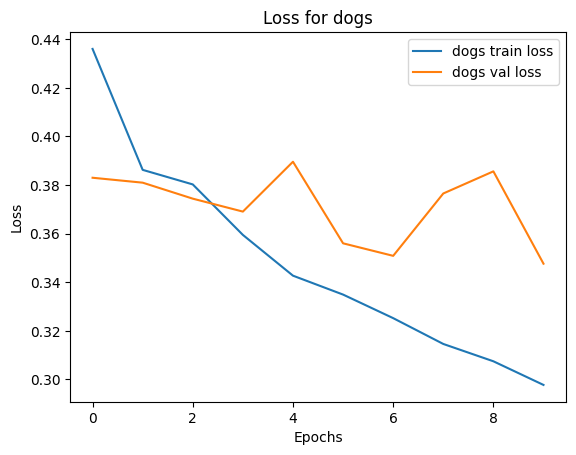

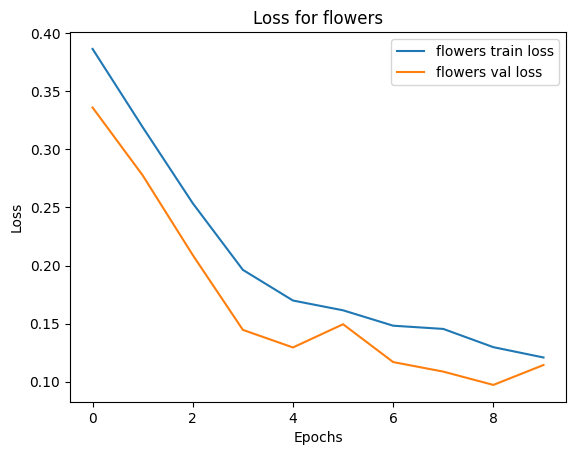

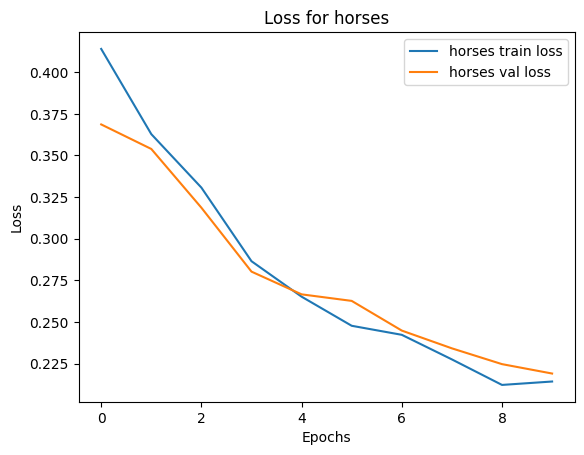

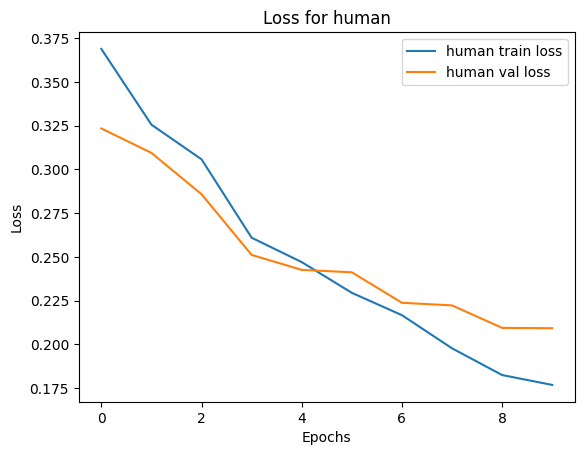

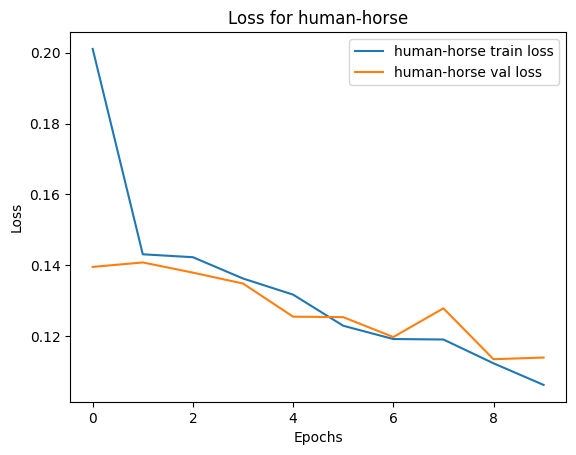

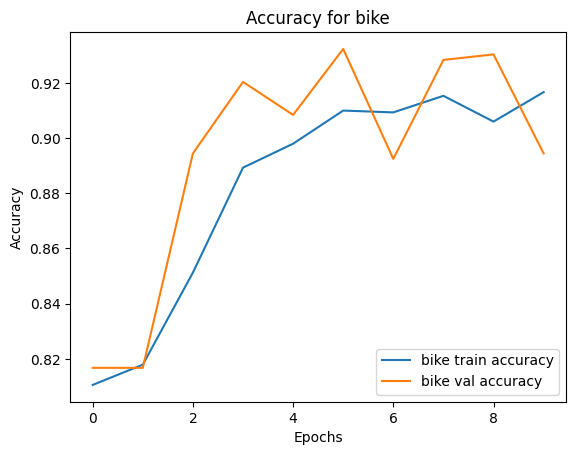

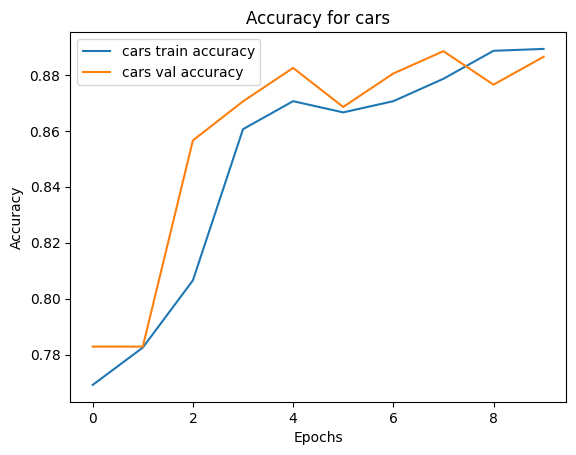

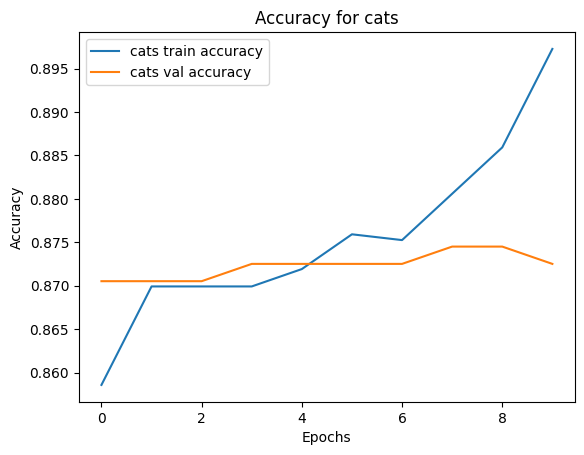

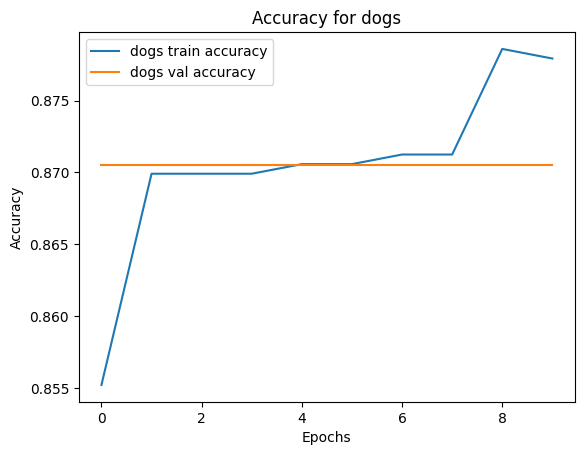

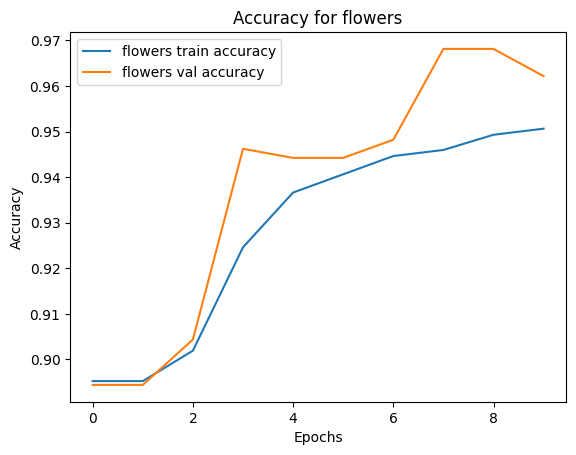

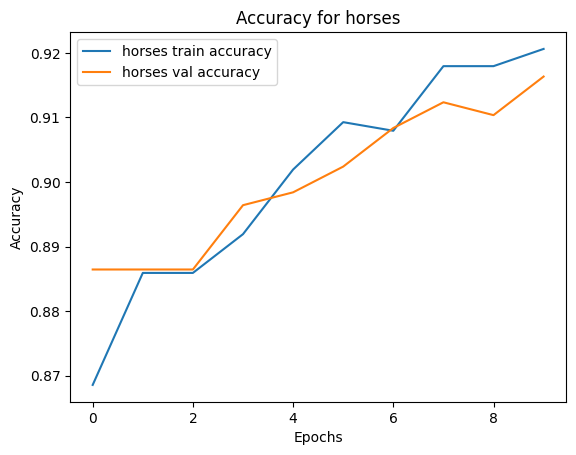

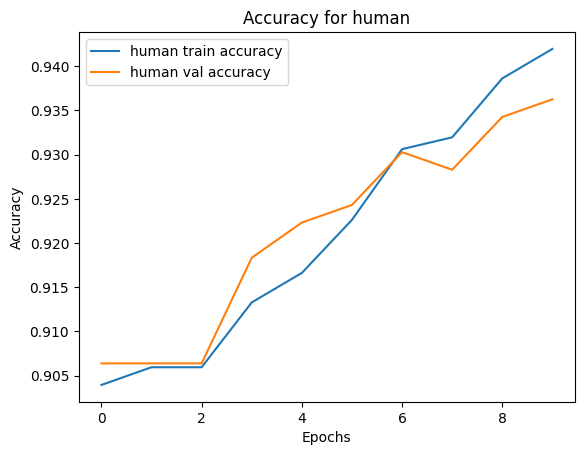

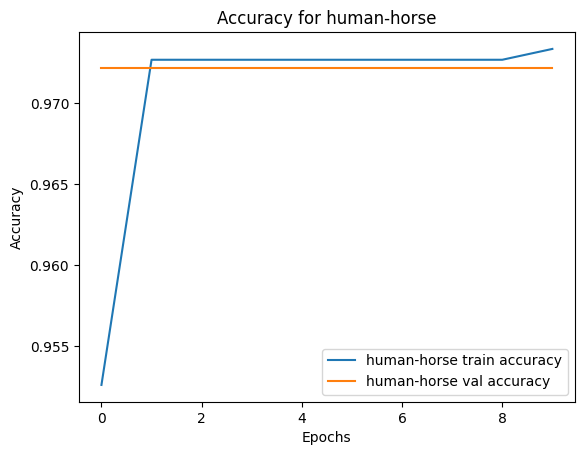

In [ ]:
# Eğitim ve doğrulama loss değerlerinin grafiğini ayrı ayrı çizme
for category in CATEGORIES:
    plt.figure()
    plt.plot(history.history[category + '_loss'], label=f'{category} train loss')
    plt.plot(history.history['val_' + category + '_loss'], label=f'{category} val loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss for {category}')
    plt.show()

# Eğitim ve doğrulama accuracy değerlerinin grafiğini ayrı ayrı çizme
for category in CATEGORIES:
    plt.figure()
    plt.plot(history.history[category + '_accuracy'], label=f'{category} train accuracy')
    plt.plot(history.history['val_' + category + '_accuracy'], label=f'{category} val accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy for {category}')
    plt.show()


# Model **Prediction**

In [ ]:
## NOTE: If you are using Safari and this cell throws an error,
## please skip this block and run the next one instead.

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  print(fn)
  print(classes)

Saving beautiful-iceland-horse.jpg to beautiful-iceland-horse.jpg
1/1 [==============================] - 0s 225ms/step
beautiful-iceland-horse.jpg
[array([[0.]], dtype=float32), array([[0.]], dtype=float32), array([[0.]], dtype=float32), array([[0.]], dtype=float32), array([[0.]], dtype=float32), array([[1.]], dtype=float32), array([[0.]], dtype=float32)]


In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np


# Kullanıcıdan görüntü dosyasını seçmesini isteyin
uploaded = files.upload()

# Yüklenen dosyanın adını alın
file_name = next(iter(uploaded))

# Seçilen dosyayı kullanarak görüntüyü yükleyin (150x150 piksel boyutunda)
img = image.load_img(file_name, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Geri kalan işlemi buraya ekleyin: Tahmin işlemi vb.

Saving horse-1.jpg to horse-1.jpg


1/1 [==============================] - 0s 39ms/step


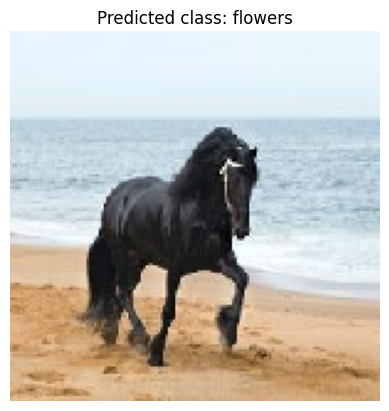

In [ ]:
# Tahmin işlemi
predictions = model.predict(img_array)

# Tahmin edilen sınıfın indeksini alın
predicted_class_index = np.argmax(predictions)

# Tahmin edilen sınıfın adını alın
predicted_class = CATEGORIES[predicted_class_index]

# Görüntüyü ve tahmin edilen sınıfı gösterin
plt.imshow(img)
plt.title(f'Predicted class: {predicted_class}')
plt.axis('off')
plt.show()


# **Visualizing Intermediate Representations**




In [ ]:
train_human=os.path.join(train_path,'human')
train_horses=os.path.join(train_path,'horses')

train_human_fnames = os.listdir( train_human )
train_horses_fnames = os.listdir( train_horses )

print(train_human_fnames[:10])
print(train_horses_fnames[:10])

In [ ]:
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.


human_img_files = [os.path.join(train_human, f) for f in train_human_fnames]
horses_img_files = [os.path.join(train_horses, f) for f in train_horses_fnames]

img_path = random.choice(human_img_files + horses_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

  if len(feature_map.shape) == 4:

    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))

    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )